# Regressão Linear com PyTorch

## Objetivo

Este exemplo utiliza regressão linear para estimar o comprimento das sépalas da íris a partir do seu comprimento das pétalas.
Utiliza-se
- o cálculo do gradiente automático do PyTorch, porém
- a função de perda e
- atualização dos parâmetros é feita de forma explícita.
- A rede é criada com uma camada nn.Linear()

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoLinear_Otimizacao.png)

## Importação dos pacotes

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from sklearn.datasets import load_iris

import torch
from torch import nn, optim
from torch.autograd import Variable

torch.manual_seed(1234)

## Leitura dos dados

In [28]:
iris = load_iris()
data = iris.data[iris.target==1,::2]  # comprimento das sépalas e pétalas, indices 0 e 2

x_train = data[:,0:1].astype(np.float32)
y_train = data[:,1:2].astype(np.float32)

n_samples = x_train.shape[0]
print('x_train.shape:',x_train.shape, x_train.dtype)
print('y_train.shape:',y_train.shape, y_train.dtype)

print('x_train[:5]:\n', x_train[:5])
print('y_train[:5]:\n', y_train[:5])

x_train.shape: (50, 1) float32
y_train.shape: (50, 1) float32
x_train[:5]:
 [[7. ]
 [6.4]
 [6.9]
 [5.5]
 [6.5]]
y_train[:5]:
 [[4.7]
 [4.5]
 [4.9]
 [4. ]
 [4.6]]


### Normalização dos dados

In [29]:
x_train -= x_train.min()
x_train /= x_train.max()
y_train -= y_train.min()
y_train /= y_train.max()


In [30]:
print('x_train[:5]:\n', x_train[:5])
print('y_train[:5]:\n', y_train[:5])

x_train[:5]:
 [[1.        ]
 [0.71428573]
 [0.952381  ]
 [0.28571424]
 [0.7619048 ]]
y_train[:5]:
 [[0.80952376]
 [0.71428573]
 [0.90476197]
 [0.4761905 ]
 [0.7619048 ]]


In [31]:
x_train_bias = np.hstack([np.ones(shape=(n_samples,1)), x_train])

In [32]:
x_train_bias

array([[1.        , 1.        ],
       [1.        , 0.71428573],
       [1.        , 0.95238101],
       [1.        , 0.28571424],
       [1.        , 0.76190478],
       [1.        , 0.38095227],
       [1.        , 0.66666675],
       [1.        , 0.        ],
       [1.        , 0.80952376],
       [1.        , 0.14285702],
       [1.        , 0.047619  ],
       [1.        , 0.47619051],
       [1.        , 0.52380949],
       [1.        , 0.57142848],
       [1.        , 0.33333325],
       [1.        , 0.85714275],
       [1.        , 0.33333325],
       [1.        , 0.42857149],
       [1.        , 0.61904752],
       [1.        , 0.33333325],
       [1.        , 0.47619051],
       [1.        , 0.57142848],
       [1.        , 0.66666675],
       [1.        , 0.57142848],
       [1.        , 0.71428573],
       [1.        , 0.80952376],
       [1.        , 0.90476197],
       [1.        , 0.85714275],
       [1.        , 0.52380949],
       [1.        , 0.38095227],
       [1.

In [33]:
print('x_train_bias.shape:',x_train_bias.shape, x_train_bias.dtype)

x_train_bias.shape: (50, 2) float64


In [34]:
x_train_bias = torch.FloatTensor(x_train_bias)
y_train      = torch.FloatTensor(y_train)
print(y_train)

tensor([[0.8095],
        [0.7143],
        [0.9048],
        [0.4762],
        [0.7619],
        [0.7143],
        [0.8095],
        [0.1429],
        [0.7619],
        [0.4286],
        [0.2381],
        [0.5714],
        [0.4762],
        [0.8095],
        [0.2857],
        [0.6667],
        [0.7143],
        [0.5238],
        [0.7143],
        [0.4286],
        [0.8571],
        [0.4762],
        [0.9048],
        [0.8095],
        [0.6190],
        [0.6667],
        [0.8571],
        [0.9524],
        [0.7143],
        [0.2381],
        [0.3810],
        [0.3333],
        [0.4286],
        [1.0000],
        [0.7143],
        [0.7143],
        [0.8095],
        [0.6667],
        [0.5238],
        [0.4762],
        [0.6667],
        [0.7619],
        [0.4762],
        [0.1429],
        [0.5714],
        [0.5714],
        [0.5714],
        [0.6190],
        [0.0000],
        [0.5238]])


## Model

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoLinearNeuronio.png)

In [35]:
#Inicialização usando toch.nn.Linear

model = torch.nn.Linear(in_features=2, out_features=1, bias=False)

In [10]:
model.weight

Parameter containing:
tensor([[-0.6661, -0.1387]], requires_grad=True)

### Verificando a inicialização dos parâmetros

In [36]:
model.weight.data = torch.zeros(1,2)
torch.nn.init.uniform(model.weight.data, -0.1, 0.1)
model.weight

/var/folders/kc/1xwjc0hs5d3fh5nswnpvwlmm0000gn/T/ipykernel_17034/2197199425.py:2: FutureWarning: `nn.init.uniform` is now deprecated in favor of `nn.init.uniform_`.
  torch.nn.init.uniform(model.weight.data, -0.1, 0.1)


Parameter containing:
tensor([[-0.0896, -0.0064]], requires_grad=True)

### Testando o predict da rede

In [37]:
xx = torch.ones((5,2))
xx

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])

In [38]:
model(Variable(xx))

tensor([[-0.0960],
        [-0.0960],
        [-0.0960],
        [-0.0960],
        [-0.0960]], grad_fn=<MmBackward0>)

## Treinamento

In [39]:
model.weight.data[0][1]

tensor(-0.0064)

In [40]:
num_epochs = 100
learning_rate = 0.5
w0_list = []
w1_list = []
w0_list.append(model.weight.data[0][0])
w1_list.append(model.weight.data[0][1])
for epoch in range(num_epochs):
    inputs = Variable(x_train_bias)
    target = Variable(y_train)

    # forward - predict
    y_pred = model(x_train_bias)

    #loss cálculo da função de perda
    loss = torch.mean((y_pred - y_train)**2)

    # backward propagation - cálculo gradient
    loss.backward()

    # gradiente descendente
    model.weight.data = model.weight.data - learning_rate * model.weight.grad.data
    w0_list.append(model.weight.data[0][0])
    w1_list.append(model.weight.data[0][1])

    # zeragem parâmetros próximo cálculo do gradiente
    model.weight.grad.data.zero_()

    # verbose
    if (epoch+1) % 20 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss.data))

Epoch[20/100], loss: 0.022719
Epoch[40/100], loss: 0.021394
Epoch[60/100], loss: 0.021202
Epoch[80/100], loss: 0.021174
Epoch[100/100], loss: 0.021170


In [41]:
print(w0_list)

[tensor(-0.0896), tensor(0.6031), tensor(0.4143), tensor(0.4512), tensor(0.4310), tensor(0.4259), tensor(0.4174), tensor(0.4102), tensor(0.4031), tensor(0.3965), tensor(0.3901), tensor(0.3840), tensor(0.3782), tensor(0.3727), tensor(0.3675), tensor(0.3625), tensor(0.3577), tensor(0.3531), tensor(0.3488), tensor(0.3447), tensor(0.3408), tensor(0.3370), tensor(0.3334), tensor(0.3300), tensor(0.3268), tensor(0.3237), tensor(0.3208), tensor(0.3180), tensor(0.3153), tensor(0.3128), tensor(0.3103), tensor(0.3080), tensor(0.3058), tensor(0.3037), tensor(0.3017), tensor(0.2998), tensor(0.2980), tensor(0.2963), tensor(0.2946), tensor(0.2931), tensor(0.2916), tensor(0.2901), tensor(0.2888), tensor(0.2875), tensor(0.2863), tensor(0.2851), tensor(0.2840), tensor(0.2829), tensor(0.2819), tensor(0.2809), tensor(0.2800), tensor(0.2791), tensor(0.2783), tensor(0.2775), tensor(0.2767), tensor(0.2760), tensor(0.2753), tensor(0.2746), tensor(0.2740), tensor(0.2734), tensor(0.2728), tensor(0.2723), tensor

## Avaliação

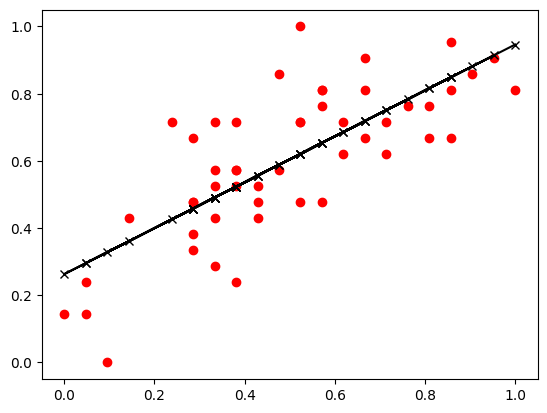

In [42]:
y_pred = model(Variable(x_train_bias))
plt.plot(x_train, y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train, y_pred.data.numpy(), 'kx-', label='Fitting Line')
plt.show()

### Acessando os parâmetros

In [43]:
w_dic = model.state_dict()
w_dic

OrderedDict([('weight', tensor([[0.2630, 0.6833]]))])

### Parâmetros ótimos, solução analítica

In [44]:
x_bias = x_train_bias
y = y_train
x_bias_t = torch.t(x_bias)
w_opt = (torch.inverse(x_bias_t.mm(x_bias)).mm(x_bias_t)).mm(y)
print(torch.t(w_opt))

tensor([[0.2613, 0.6865]])


# Exercícios

- 1) Por que no final da varredura do laço de treinamento, a perda é impressa utilizando
   `loss.data`? Por que precisa do `data`?

Resposta: Precisamos do `data` para acessar o valor da perda porque `loss` é um objeto que possui todas as informações do grado computacional. como queremos somente os valores das perdas, precisamos acessar os valores com `loss.data`.
   

- 2) Calcule e imprima o valor da perda (MSE) fazendo o predict da rede com os pesos já
   treinados.

In [45]:
y_pred = model(x_train_bias)

mse_loss = torch.mean((y_pred - y_train)**2)

print(f'Erro Quadrático Médio (MSE) após o treinamento: {mse_loss.data:.6f}')

Erro Quadrático Médio (MSE) após o treinamento: 0.021170


- 3) Crie duas listas `w0_list` e `w1_list` para guardar a evolução dos valores dos
   parâmetros durante o laço de treinamento.
   Modifique o exemplo do gráfico tipo **scatter plot** para visualizar a variação
   dos parâmetros do modelo duas dimensões.
   Marque neste gráfico o valor ótimo do parâmetro dado pela solução
   analítica.

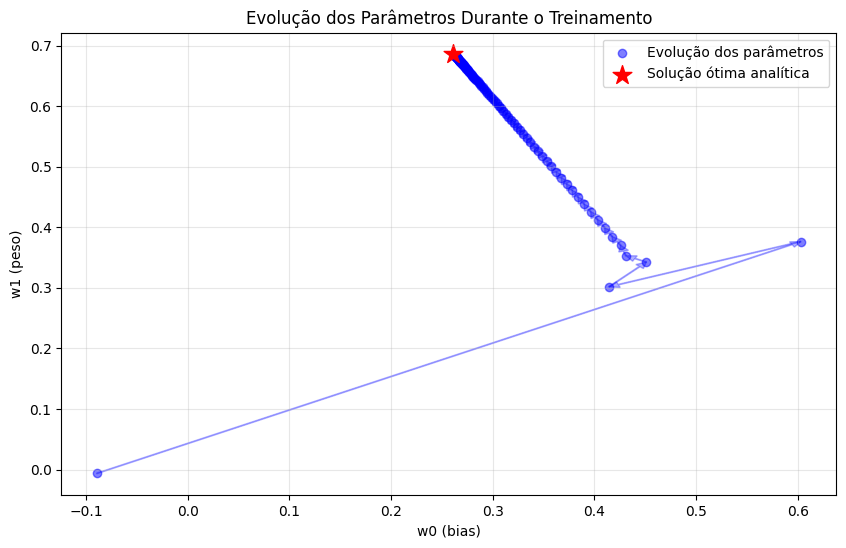

In [46]:
plt.figure(figsize=(10, 6))

# Plotando os pontos da evolução dos parâmetros
plt.scatter(w0_list, w1_list, c='blue', alpha=0.5, label='Evolução dos parâmetros')

# Adicionando as setas para mostrar a direção da evolução
w0_old = None
w1_old = None
for (w0, w1) in zip(w0_list, w1_list):
    if w0_old is not None:
        plt.arrow(w0_old, w1_old, w0-w0_old, w1-w1_old,
                 head_length=0.01, head_width=0.01,
                 shape='full', length_includes_head=True,
                 fc='blue', ec='blue', alpha=0.3)
    w0_old, w1_old = w0, w1

# Plotando o ponto ótimo da solução analítica
w_opt_0 = torch.t(w_opt)[0][0].item()  # Primeiro parâmetro da solução analítica
w_opt_1 = torch.t(w_opt)[0][1].item()  # Segundo parâmetro da solução analítica
plt.scatter(w_opt_0, w_opt_1, c='red', marker='*', s=200, label='Solução ótima analítica')

# Configurações do gráfico
plt.xlabel('w0 (bias)')
plt.ylabel('w1 (peso)')
plt.title('Evolução dos Parâmetros Durante o Treinamento')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

## Ploting vectors

# Aprendizados